In [10]:
import pandas as pd 
import numpy as np
from ACTS import ACTS
import timeit
from numba import njit, prange
import math
from tqdm import tqdm 
from acts_trial_file import load_pickle_data
from sklearn.utils import check_array
from sklearn import tree
import matplotlib.pyplot as plt
from random import randint

In [3]:
df = load_pickle_data("/home/willinki/Tesi/Software/ACTS/Data/benchmark_data.pkl")
df["index"] = [x for x in range(len(df.index))]
df = df.set_index("index")
instances_0 = [1788, 2703, 4125, 3893]
DL0 = np.stack(df.loc[instances_0, "ts"])
L0 = df.loc[instances_0, "label"].to_numpy()
Li0 = df.loc[instances_0].index
X0 = np.stack(df["ts"].drop(Li0))
def extracts_new_instances(index, n_inst = 10, max_num = len(df.index)):
    numbers = []
    while len(numbers) < n_inst:
        last = randint(0, max_num)
        if last not in numbers:
            numbers.append(last)
    return np.append(index, numbers)
acts2 = ACTS()
for _ in tqdm(range(20)):
    ################################################ HERE #########################################################################
    acts2(X0, DL0, L0, Li0)
    ###############################################################################################################################
    instances_0 = extracts_new_instances(index = instances_0)
    DL0 = np.stack(df.loc[instances_0, "ts"])
    L0 = df.loc[instances_0, "label"].to_numpy()
    Li0 = df.loc[instances_0].index
    X0 = np.stack(df["ts"].drop(Li0))

  0%|          | 0/20 [00:00<?, ?it/s]/home/willinki/Tesi/Software/ACTS/ACTS.py:293: RuntimeWarning: divide by zero encountered in double_scalars
  for ts in instances
100%|██████████| 20/20 [50:21<00:00, 151.07s/it]


# 1 INSTANCES

In [7]:
acts2.instances.head(10)

,ts,label,near_pt
key,,,
1788,"[0.026911384615384615, 0.0043809230769230765, ...",0,33919641037691892
2703,"[0.03963417165668663, -0.021928742514970057, 0...",1,31454460134308572
4125,"[0.06536407185628743, -0.10677485029940119, 0....",3,53204220762892984
3893,"[0.3453370858283433, 0.011695329341317366, -0....",2,53204220762892984
1715,"[0.09429415384615383, 0.12350030769230769, 0.1...",0,33919641037691892
4035,"[-0.05035489021956088, 0.08332922155688623, 0....",2,53204220762892984
3705,"[0.09128854291417166, 0.09356263473053893, 0.0...",2,53204220762892984
4597,"[0.06974874251497007, -0.029596526946107784, 0...",3,-30851166917446828
3478,"[0.1669833133732535, 0.025827185628742515, -0....",2,53204220762892984


# 2 PATTERNS

,ts,idx,inst_keys,labels,l_probas,lambda
key,,,,,,
53204220762892984,"[0.04847497005988024, -0.12792682634730537, 0....",10,"[4125, 3893, 4035, 3705, 3478, 3051, 3773, 335...","[3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[0.0, 0.0, 0.975609756097561, 0.02439024390243...",32.209272
173697520003292544,"[-0.06676083832335329, 0.9625905788423155, -0....",13,"[3328, 3078]","[2, 2]","[0.0, 0.0, 1.0, 0.0]",24.740035
-30851166917446828,"[-0.06162898203592814, -0.20961161676646706, 0...",17,"[4597, 4988, 4184, 4121, 4301, 4426, 4305, 477...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[0.0, 0.0, 0.0, 1.0]",60.066335
33919641037691892,"[-0.04794718562874252, 0.16763245508982036, -0...",18,"[1788, 1715, 714, 635, 422, 1762, 1035, 1425, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.0, 0.0, 0.0, 0.0]",24.041310
68120125469440088,"[0.14465353293413172, -0.05488958083832335, -0...",32,"[2933, 3152]","[1, 2]","[0.0, 0.5, 0.5, 0.0]",33.667857
31454460134308572,"[0.05708191616766468, -0.19726958083832336, -0...",50,"[2703, 2472, 2210, 2394, 2804, 2339, 2651, 258...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.0, 0.9736842105263158, 0.0, 0.0263157894736...",40.184705
37633014803547760,"[0.1763611976047904, -0.07031712574850299, -0....",53,"[4379, 4954, 4596, 4136, 4235, 4773, 4101, 428...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]","[0.0, 0.0, 0.0, 1.0]",36.241811


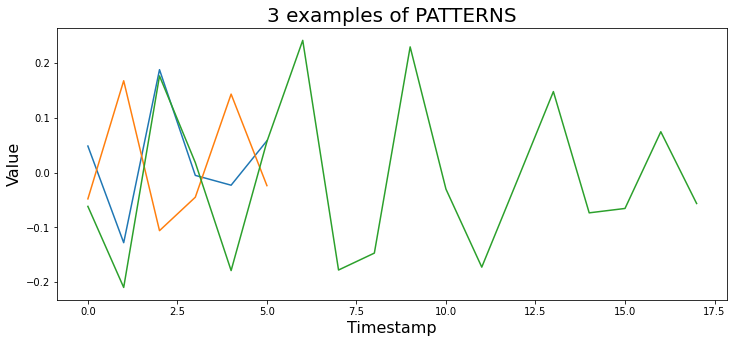

In [27]:
plt.figure(figsize=(12, 5))
for pattern in acts2.patterns["ts"].sample(3):
    plt.title("3 examples of PATTERNS", fontsize=20)
    plt.xlabel("Timestamp", fontsize=16)
    plt.ylabel("Value", fontsize=16)
    plt.plot(pattern)
acts2.patterns

## 2.1 SHAPELETS

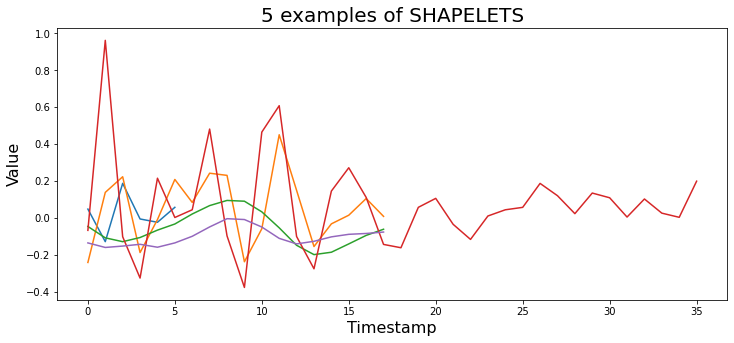

In [37]:
plt.figure(figsize=(12, 5))
for shplt in acts2.transformer.shapelets_[10:15]:
    plt.plot(shplt)
    plt.title("5 examples of SHAPELETS", fontsize=20)
    plt.xlabel("Timestamp", fontsize=16)
    plt.ylabel("Value", fontsize=16)

In [48]:
trans = pd.DataFrame(
    acts2.transformer.transform(
        np.stack(acts2.instances["ts"]), 
    )
)
trans["index"] = acts2.instances.index
trans = trans.set_index("index")
trans   

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
index,,,,,,,,,,,,,,,,,,,,,
1788,0.124846,0.120811,0.143496,0.110001,0.194904,0.219987,0.230933,0.154883,0.149535,0.108090,...,0.155379,0.140957,0.068227,0.129213,0.146690,0.282344,0.151555,0.156513,0.129070,0.037546
2703,0.048291,0.064185,0.061647,0.065698,0.131458,0.164325,0.161234,0.084037,0.071274,0.060109,...,0.105054,0.100259,0.144684,0.065039,0.100479,0.219734,0.117075,0.094464,0.000000,0.116309
4125,0.083882,0.053203,0.087386,0.055884,0.130098,0.189294,0.180481,0.076084,0.067327,0.051099,...,0.113250,0.113765,0.122696,0.051871,0.112640,0.226987,0.134605,0.118971,0.074720,0.098188
3893,0.072684,0.063338,0.074253,0.066301,0.134862,0.120078,0.193622,0.088054,0.085243,0.079947,...,0.110065,0.101977,0.142334,0.051115,0.097751,0.190298,0.113459,0.110766,0.067613,0.116200
1715,0.126603,0.117193,0.149933,0.115083,0.192957,0.223637,0.233760,0.152898,0.147158,0.110537,...,0.155714,0.146120,0.078147,0.126353,0.153970,0.279638,0.155416,0.148501,0.129119,0.041102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,0.121799,0.114484,0.143942,0.107146,0.193613,0.224899,0.227375,0.152417,0.146226,0.103412,...,0.151069,0.132831,0.101959,0.131479,0.141184,0.287812,0.160030,0.142844,0.119767,0.050754
4601,0.072269,0.029839,0.061064,0.047808,0.135967,0.174030,0.147468,0.071661,0.025837,0.064246,...,0.101527,0.086199,0.126345,0.066681,0.089616,0.248174,0.128963,0.086029,0.067297,0.100493
3264,0.090291,0.078338,0.106131,0.073465,0.171179,0.118609,0.205999,0.106649,0.096369,0.071211,...,0.135843,0.126259,0.105197,0.089710,0.113195,0.205026,0.112913,0.134892,0.094497,0.072972


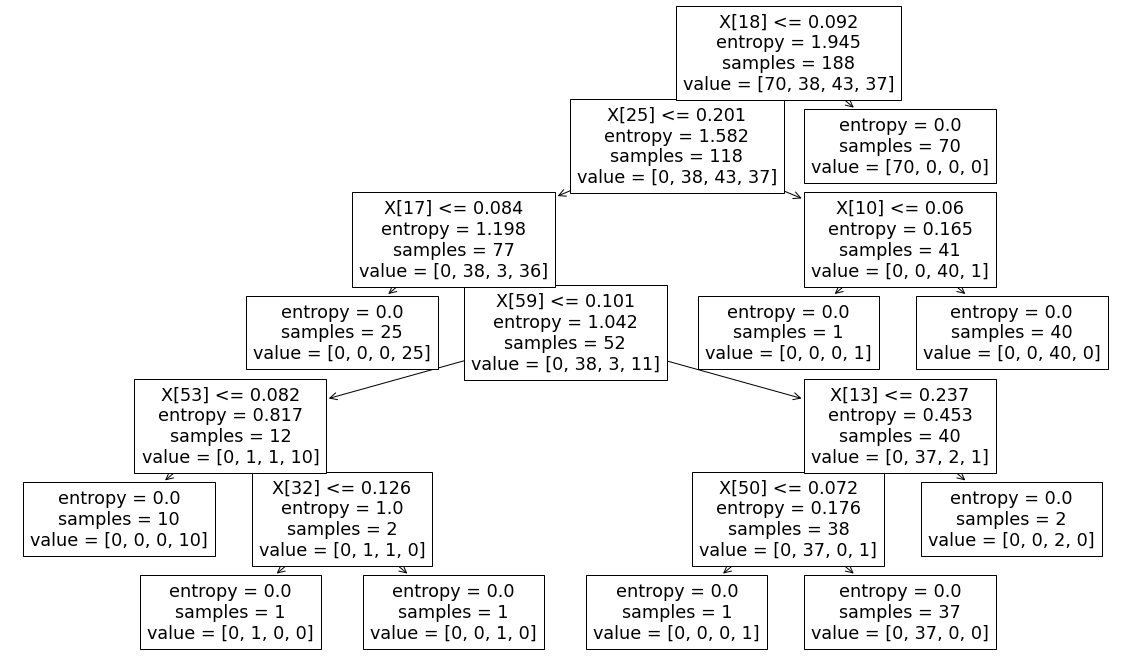

In [57]:
plt.figure(figsize=(20, 12))
tree.plot_tree(acts2.tree);

In [56]:
acts2.patterns

,ts,idx,inst_keys,labels,l_probas,lambda
key,,,,,,
53204220762892984,"[0.04847497005988024, -0.12792682634730537, 0....",10,"[4125, 3893, 4035, 3705, 3478, 3051, 3773, 335...","[3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[0.0, 0.0, 0.975609756097561, 0.02439024390243...",32.209272
173697520003292544,"[-0.06676083832335329, 0.9625905788423155, -0....",13,"[3328, 3078]","[2, 2]","[0.0, 0.0, 1.0, 0.0]",24.740035
-30851166917446828,"[-0.06162898203592814, -0.20961161676646706, 0...",17,"[4597, 4988, 4184, 4121, 4301, 4426, 4305, 477...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[0.0, 0.0, 0.0, 1.0]",60.066335
33919641037691892,"[-0.04794718562874252, 0.16763245508982036, -0...",18,"[1788, 1715, 714, 635, 422, 1762, 1035, 1425, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.0, 0.0, 0.0, 0.0]",24.041310
68120125469440088,"[0.14465353293413172, -0.05488958083832335, -0...",32,"[2933, 3152]","[1, 2]","[0.0, 0.5, 0.5, 0.0]",33.667857
31454460134308572,"[0.05708191616766468, -0.19726958083832336, -0...",50,"[2703, 2472, 2210, 2394, 2804, 2339, 2651, 258...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.0, 0.9736842105263158, 0.0, 0.0263157894736...",40.184705
37633014803547760,"[0.1763611976047904, -0.07031712574850299, -0....",53,"[4379, 4954, 4596, 4136, 4235, 4773, 4101, 428...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]","[0.0, 0.0, 0.0, 1.0]",36.241811
